# Credit Card Fraud Detection

* Build a machine learning model to identify fraudulent credit card transactions.
* Preprocess and normalize the transaction data, handle class imbalance issues, and split the dataset into training and testing sets.
* Train a classification algorithm, such as logistic regression or random
forests, to classify transactions as fraudulent or genuine.
* Evaluate the model' s performance using metrics like precision, recall, and F1-score, and consider techniques like oversampling or undersampling for improving results.


---


Dataset: [dataset.csv](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)


---


Submitted By: Nishchal Kansara<br>
Data Science (Intern)<br>
Batch: December A91<br>
Submitted To: CodSoft


---




# Loading and Exploring the Dataset

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Data Science/CodSoft (Internship)/credit_card_fraud_detection/dataset.csv'

df = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
rows, cols = df.shape
print(f"rows={rows} and cols={cols}")

rows=284807 and cols=31


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
non_fraud = df[df.Class == 0]
fraud = df[df.Class == 1]

In [ ]:
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [ ]:
non_fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


# Exploratory Data Analysis

In [ ]:
fraud_counts = df['Class'].value_counts()
print(fraud_counts)

Class
0    284315
1       492
Name: count, dtype: int64


## Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Transaction Class Distribution

In [ ]:
class_counts = df['Class'].value_counts()

class_distribution = pd.DataFrame({
    'Class': ['Non-Fraudulent', 'Fraudulent'],
    'Count': class_counts.values
})

fig = px.bar(
    class_distribution,
    x='Class',
    y='Count',
    text='Count',
    color='Class',
    color_discrete_map={'Non-Fraudulent': 'lightgreen', 'Fraudulent': 'pink'},
    title='Transaction Class Distribution'
)

fig.update_traces(
    textposition='outside',
    hovertemplate='<b>%{x}</b><br>Count: %{y}<extra></extra>',
    marker=dict(line=dict(color='black', width=1))
)

fig.update_layout(
    title={'x': 0.5, 'xanchor': 'center'},
    xaxis_title="Fraud vs Non-Fraud",
    yaxis_title="Counts"
)

fig.show()

## Transaction Amount by Class

In [ ]:
df['Class'] = df['Class'].map({0: 'Non-Fraudulent', 1: 'Fraudulent'})

fig = px.box(
    df,
    x='Class',
    y='Amount',
    color='Class',
    color_discrete_map={'Non-Fraudulent': 'lightgreen', 'Fraudulent': 'pink'},
    title='Transaction Amount by Class'
)

fig.update_layout(
    title={'x': 0.5, 'xanchor': 'center'},
    xaxis_title="Transaction Class",
    yaxis_title="Transaction Amount"
)

fig.show()

Output hidden; open in https://colab.research.google.com to view.

## Transaction Amount Over Time

In [ ]:
fig = px.scatter(
    df,
    x='Time',
    y='Amount',
    color='Class',
    color_discrete_map={'Non-Fraudulent': 'lightgreen', 'Fraudulent': 'pink'},
    title='Transaction Amount Over Time'
)

fig.update_layout(
    title={'x': 0.5, 'xanchor': 'center'},
    xaxis_title="Transaction Time",
    yaxis_title="Transaction Amount"
)

fig.show()

Output hidden; open in https://colab.research.google.com to view.

## Feature Distribution Comparison

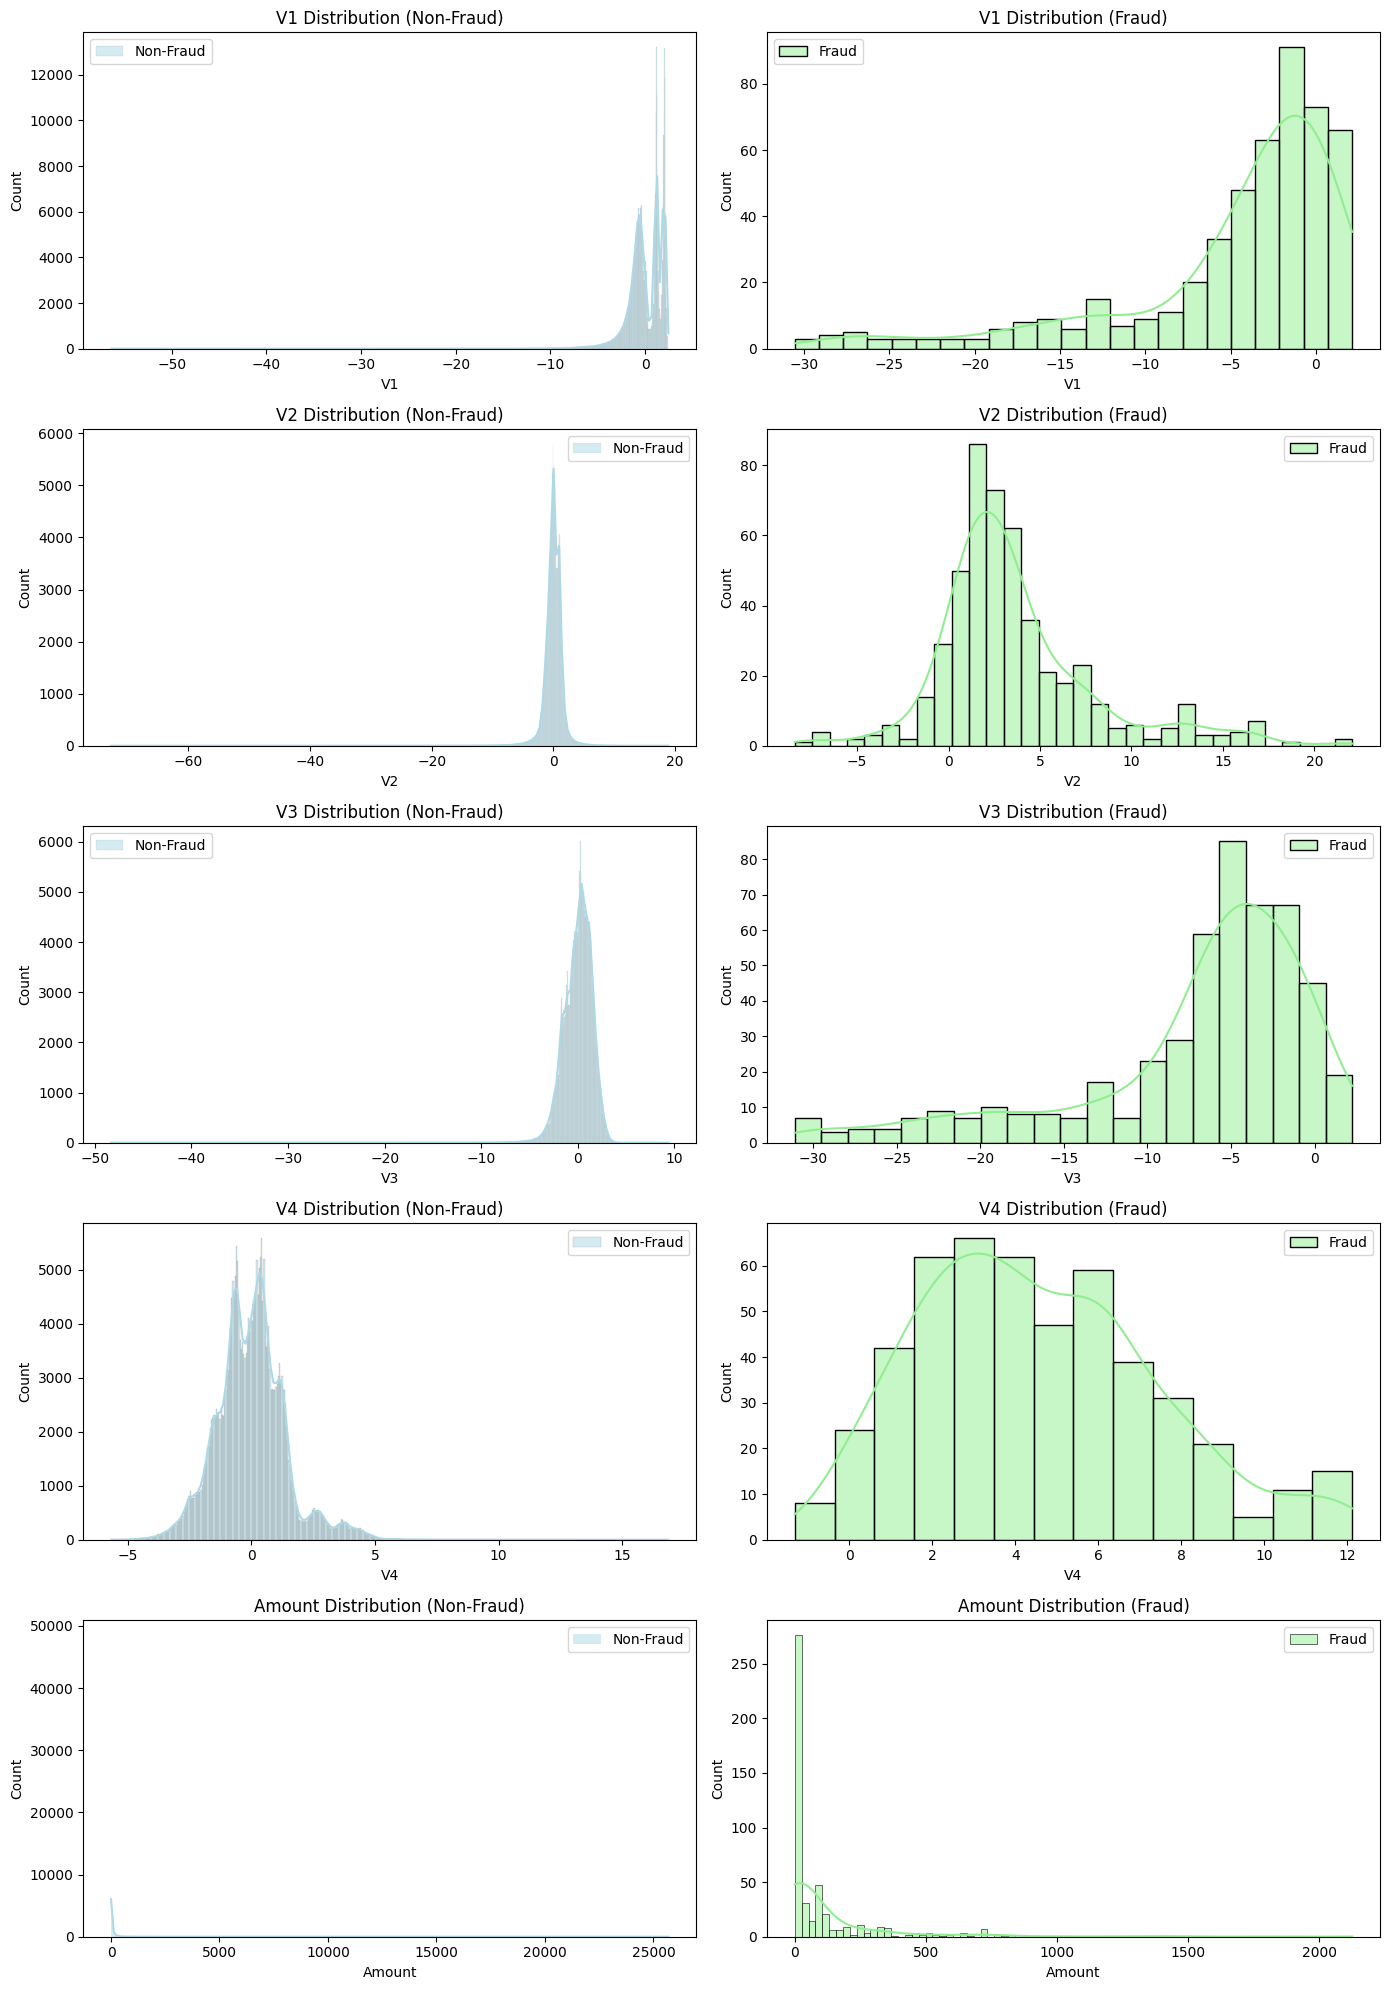

In [ ]:
features = ['V1', 'V2', 'V3', 'V4', 'Amount']

fig, axs = plt.subplots(nrows=len(features), ncols=2, figsize=(14, 20))

for i, feature in enumerate(features):
    sns.histplot(non_fraud[feature], ax=axs[i][0], color='lightblue', kde=True, label='Non-Fraud')
    axs[i][0].set_title(f'{feature} Distribution (Non-Fraud)')
    axs[i][0].legend()

    sns.histplot(fraud[feature], ax=axs[i][1], color='lightgreen', kde=True, label='Fraud')
    axs[i][1].set_title(f'{feature} Distribution (Fraud)')
    axs[i][1].legend()

plt.tight_layout()
plt.show()

# Heatmap for Correlation

In [ ]:
corr_matrix_fraud = fraud.corr()
print(corr_matrix_fraud)

            Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000  0.263358 -0.255465  0.209597 -0.196576  0.320502  0.143117   
V1      0.263358  1.000000 -0.819226  0.907875 -0.562688  0.894968  0.223961   
V2     -0.255465 -0.819226  1.000000 -0.876904  0.629688 -0.828391 -0.133373   
V3      0.209597  0.907875 -0.876904  1.000000 -0.723766  0.883689  0.383930   
V4     -0.196576 -0.562688  0.629688 -0.723766  1.000000 -0.550242 -0.310530   
V5      0.320502  0.894968 -0.828391  0.883689 -0.550242  1.000000  0.198775   
V6      0.143117  0.223961 -0.133373  0.383930 -0.310530  0.198775  1.000000   
V7      0.231853  0.897609 -0.862983  0.882312 -0.678238  0.839738  0.151266   
V8     -0.183096 -0.065787 -0.059535 -0.174837  0.099480 -0.207546 -0.743021   
V9      0.152750  0.631848 -0.684573  0.733208 -0.818853  0.658322  0.256004   
V10     0.226530  0.710112 -0.741085  0.818243 -0.726971  0.764589  0.301981   
V11    -0.354721 -0.394137  0.506316 -0.

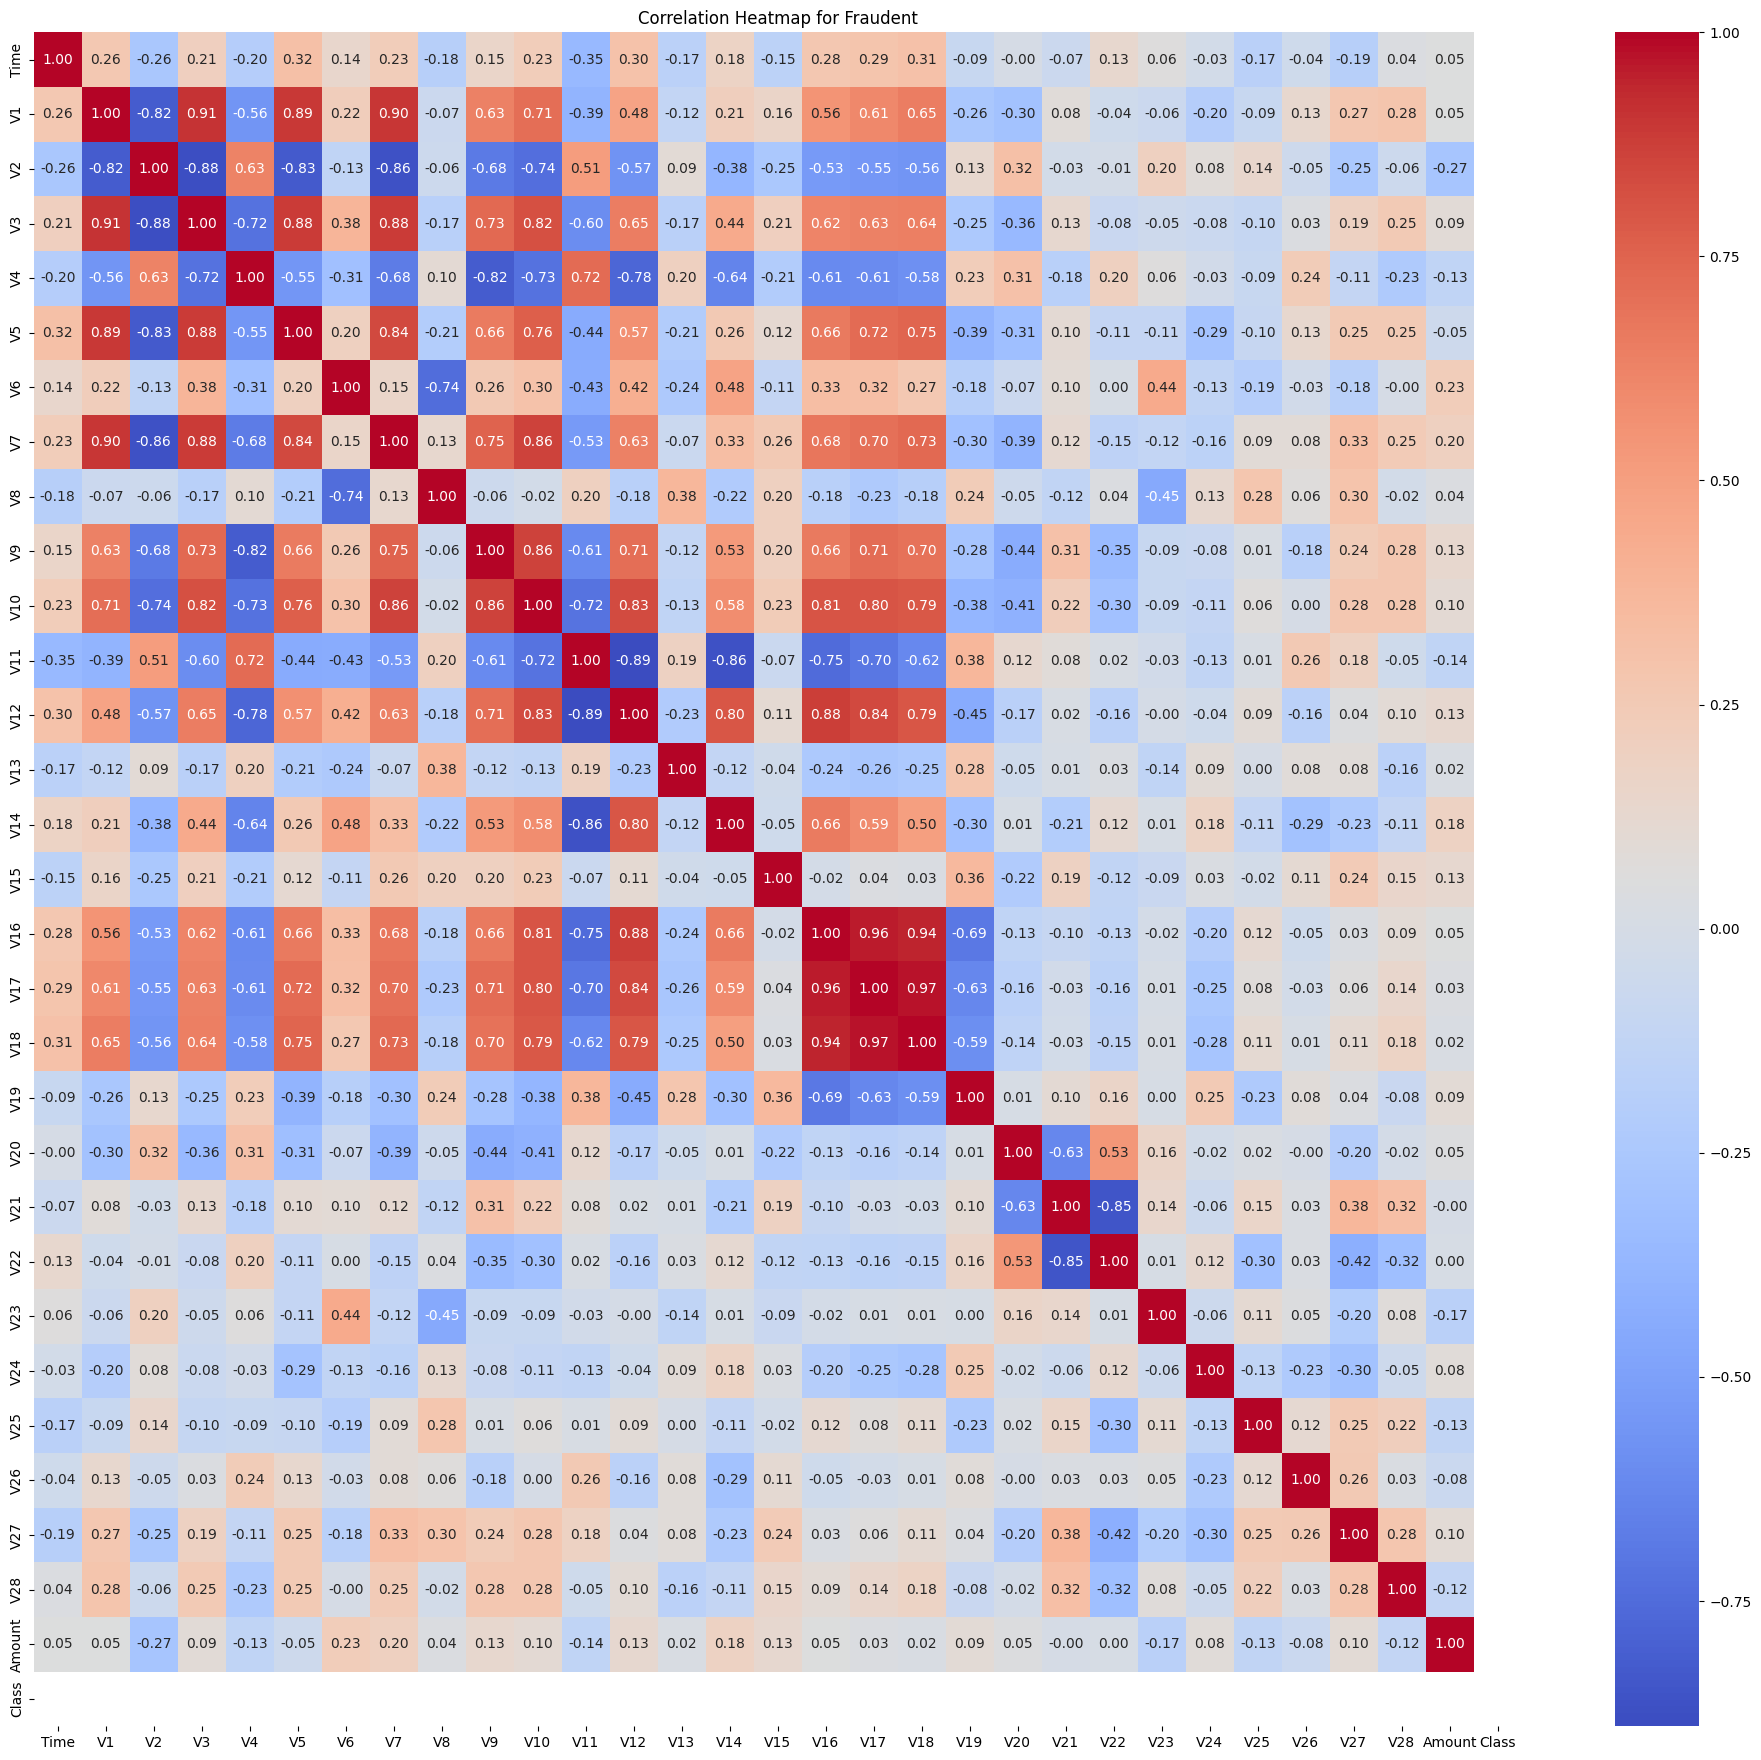

In [ ]:
plt.figure(figsize=(24, 22))
sns.heatmap(corr_matrix_fraud, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Fraudent")
plt.show()

In [ ]:
corr_matrix_non_fraud = non_fraud.corr()
print(corr_matrix_non_fraud)

            Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000  0.116489 -0.008408 -0.441001 -0.104329  0.172963 -0.064131   
V1      0.116489  1.000000  0.022537 -0.047511  0.020927 -0.031465 -0.006405   
V2     -0.008408  0.022537  1.000000  0.037855 -0.018318  0.023772  0.004879   
V3     -0.441001 -0.047511  0.037855  1.000000  0.039621 -0.048840 -0.013294   
V4     -0.104329  0.020927 -0.018318  0.039621  1.000000  0.020792  0.007452   
V5      0.172963 -0.031465  0.023772 -0.048840  0.020792  1.000000 -0.006130   
V6     -0.064131 -0.006405  0.004879 -0.013294  0.007452 -0.006130  1.000000   
V7      0.084172 -0.053563  0.042034 -0.084853  0.041284 -0.054119 -0.010838   
V8     -0.035954  0.004444 -0.000308  0.012717 -0.004830  0.010285  0.011390   
V9     -0.010577 -0.018962  0.016215 -0.033957  0.019998 -0.019872 -0.005735   
V10     0.027343 -0.043521  0.036616 -0.077708  0.042680 -0.046404 -0.013322   
V11    -0.248900  0.022628 -0.020669  0.

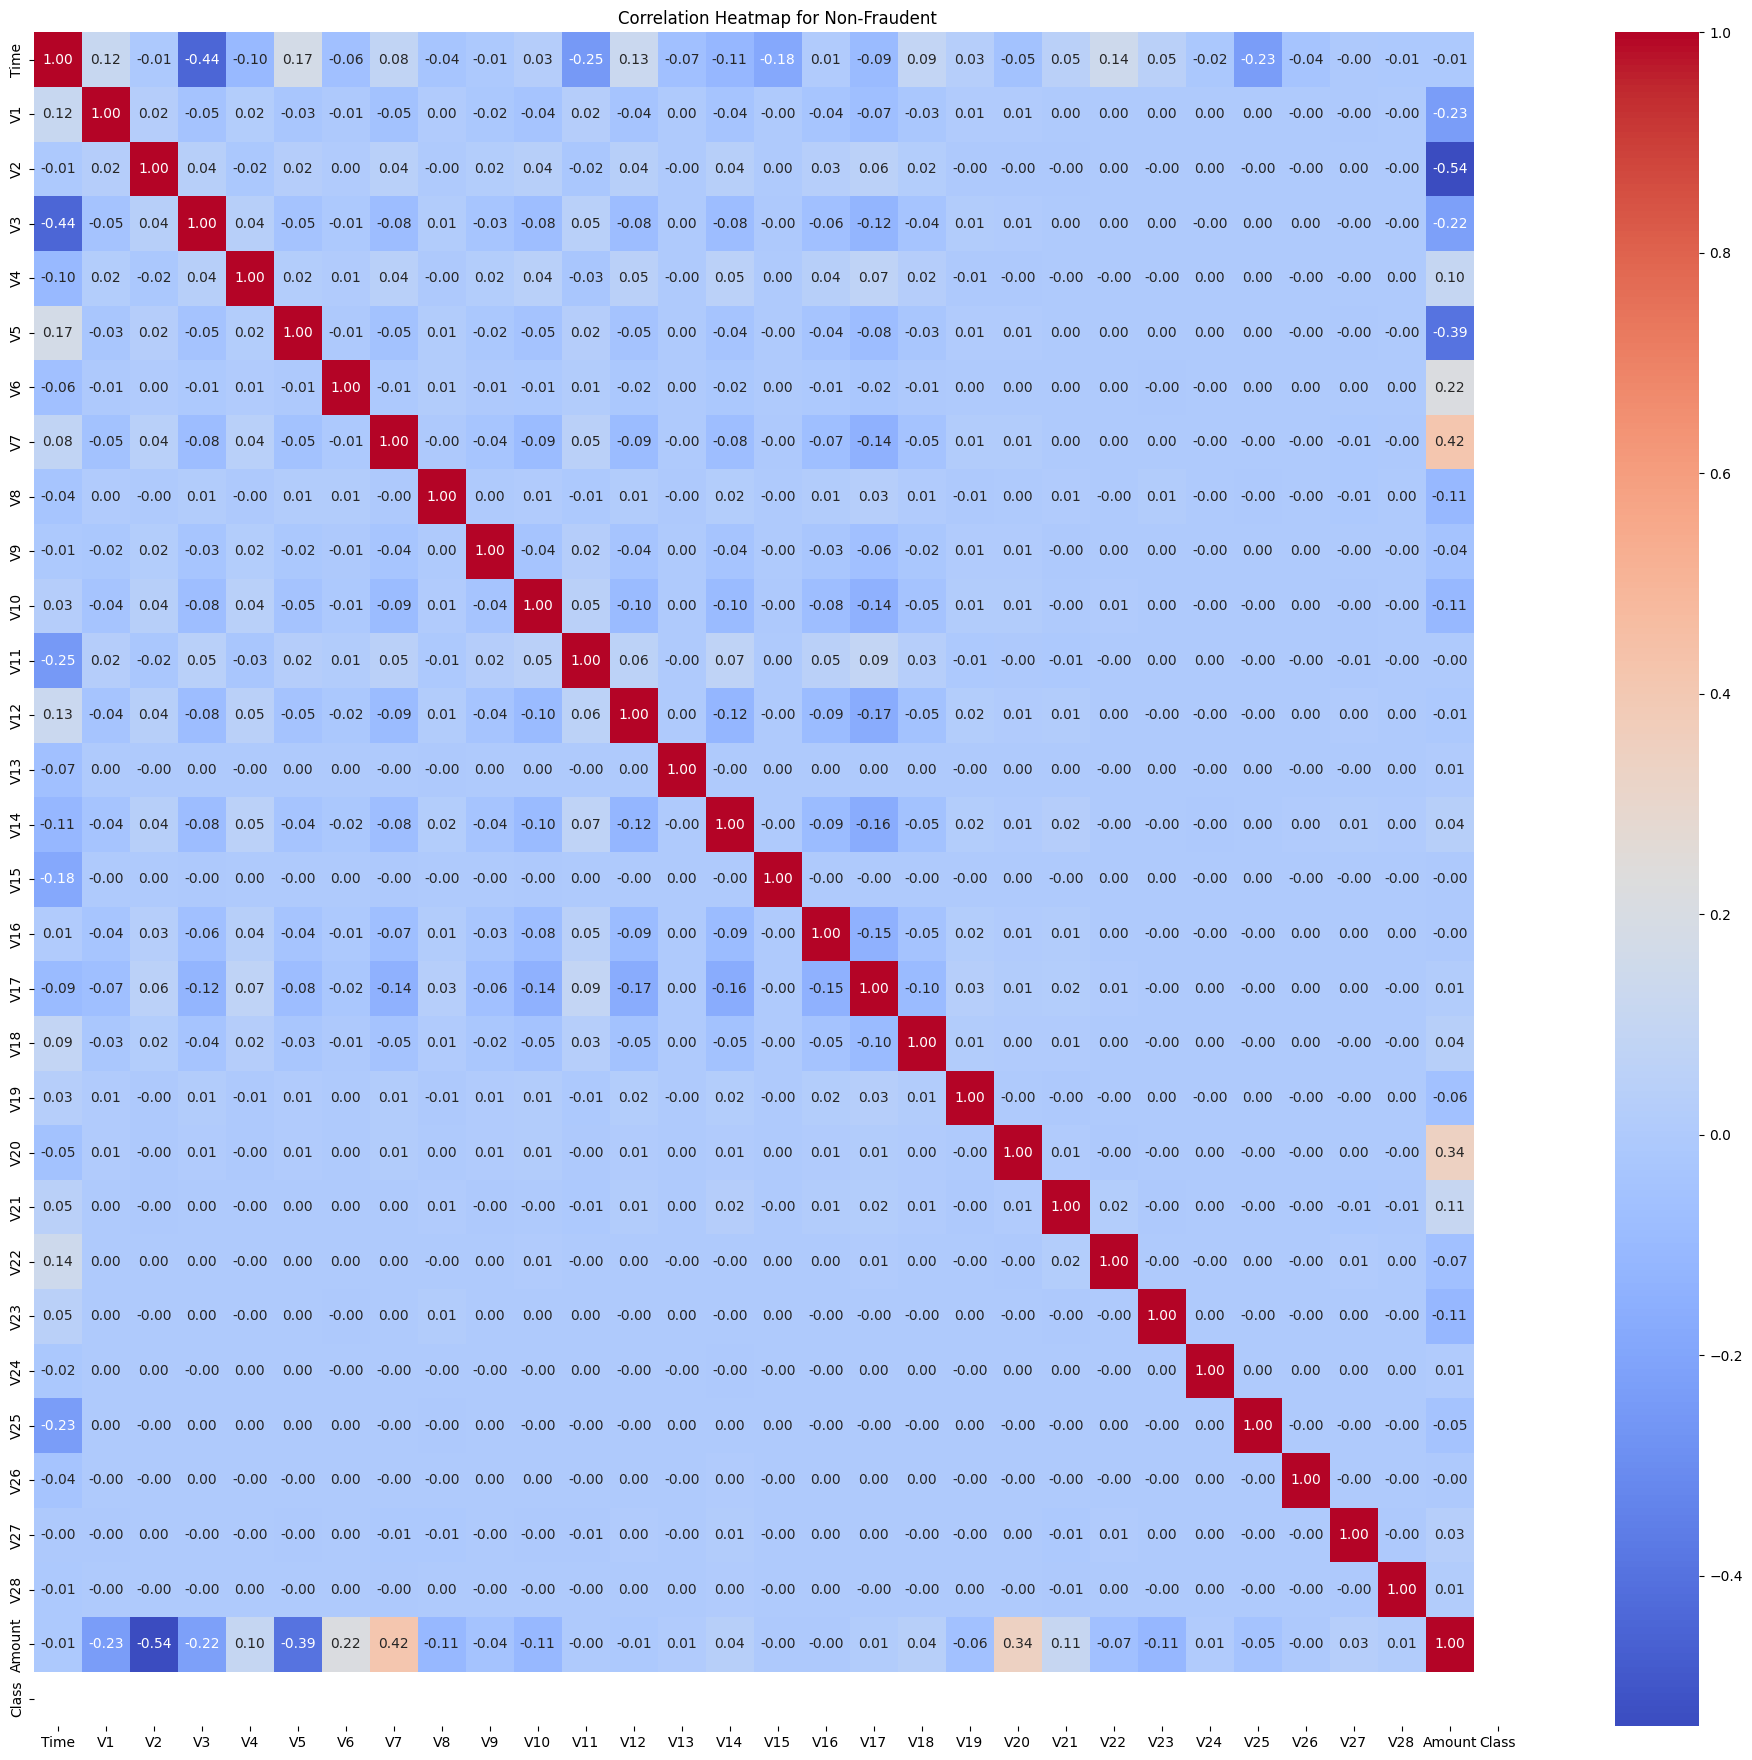

In [ ]:
plt.figure(figsize=(24, 22))
sns.heatmap(corr_matrix_non_fraud, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Non-Fraudent")
plt.show()

# Data Pre-Processing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score
from imblearn.over_sampling import SMOTE

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
df.drop(['Time'], axis=1, inplace=True)

scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Model Building

## Logistic Regression

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

y_lr_pred = lr_model.predict(X_test)

print("Logistic Regression Performance:")
print(classification_report(y_test, y_lr_pred))

Logistic Regression Performance:
                precision    recall  f1-score   support

    Fraudulent       0.97      0.92      0.95     56976
Non-Fraudulent       0.92      0.98      0.95     56750

      accuracy                           0.95    113726
     macro avg       0.95      0.95      0.95    113726
  weighted avg       0.95      0.95      0.95    113726



## eXtreme Gradient Boosting

In [ ]:
y_train_numeric = y_train.map({'Non-Fraudulent': 0, 'Fraudulent': 1})
y_test_numeric = y_test.map({'Non-Fraudulent': 0, 'Fraudulent': 1})

# Model Optimization
xgb_model = XGBClassifier(
    n_estimators=50,
    learning_rate=0.2,
    max_depth=3,
    random_state=42,
    verbosity=1
)

xgb_model.fit(X_train, y_train_numeric)

y_xgb_pred = xgb_model.predict(X_test)

y_xgb_pred_labels = pd.Series(y_xgb_pred).map({0: 'Non-Fraudulent', 1: 'Fraudulent'})

print("XGBoost Classifier Performance:")
print(classification_report(y_test, y_xgb_pred_labels))

XGBoost Classifier Performance:
                precision    recall  f1-score   support

    Fraudulent       0.99      0.97      0.98     56976
Non-Fraudulent       0.97      0.99      0.98     56750

      accuracy                           0.98    113726
     macro avg       0.98      0.98      0.98    113726
  weighted avg       0.98      0.98      0.98    113726



## Confusion Matrix

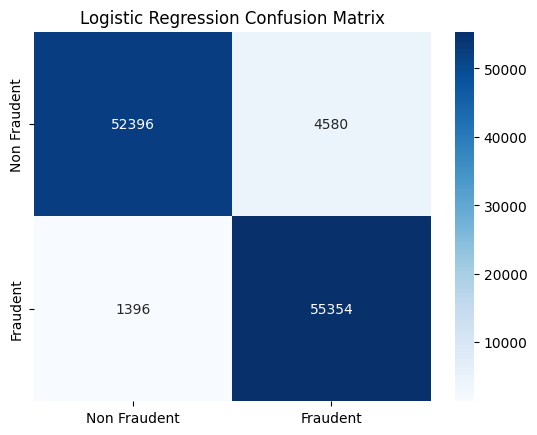

In [ ]:
lr_cm = confusion_matrix(y_test, y_lr_pred)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Fraudent', 'Fraudent'], yticklabels=['Non Fraudent', 'Fraudent'])
plt.title('Logistic Regression Confusion Matrix')
plt.show()

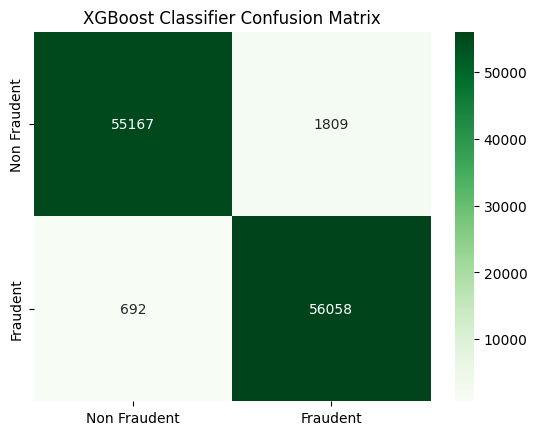

In [ ]:
xgb_cm = confusion_matrix(y_test, y_xgb_pred_labels)
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Non Fraudent', 'Fraudent'], yticklabels=['Non Fraudent', 'Fraudent'])
plt.title('XGBoost Classifier Confusion Matrix')
plt.show()

## ROC-AUC Curve

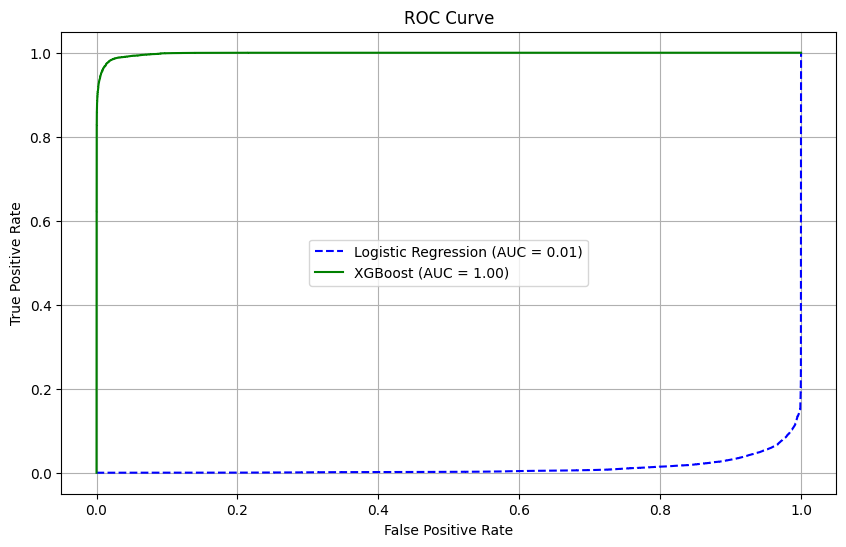

In [ ]:
lr_probs = lr_model.predict_proba(X_test)[:, 1]
lr_auc = roc_auc_score(y_test_numeric, lr_probs)

xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
xgb_auc = roc_auc_score(y_test_numeric, xgb_probs)

lr_fpr, lr_tpr, _ = roc_curve(y_test_numeric, lr_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test_numeric, xgb_probs)

plt.figure(figsize=(10, 6))
plt.plot(lr_fpr, lr_tpr, linestyle='--', label=f'Logistic Regression (AUC = {lr_auc:.2f})', color='blue')
plt.plot(xgb_fpr, xgb_tpr, linestyle='-', label=f'XGBoost (AUC = {xgb_auc:.2f})', color='green')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

# Model Comparison and Conclusion

## Model Comparison

In [ ]:
metrics = {
    'Model': ['Logistic Regression', 'XGBoost Classifier'],
    'Accuracy': [accuracy_score(y_test, y_lr_pred), accuracy_score(y_test, y_xgb_pred_labels)],
    'AUC Score': [lr_auc, xgb_auc]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

                 Model  Accuracy  AUC Score
0  Logistic Regression  0.947453   0.010784
1   XGBoost Classifier  0.978009   0.998372


## Conclusion

In [ ]:
if lr_auc > xgb_auc:
    conclusion = "Logistic Regression outperforms XGBoost with a higher AUC score."
elif lr_auc < xgb_auc:
    conclusion = "XGBoost outperforms Logistic Regression with a higher AUC score."
else:
    conclusion = "Both models have the same AUC score."

if metrics_df['Accuracy'][0] > metrics_df['Accuracy'][1]:
    conclusion += " Logistic Regression also has better accuracy."
elif metrics_df['Accuracy'][0] < metrics_df['Accuracy'][1]:
    conclusion += " XGBoost has better accuracy."
else:
    conclusion += " Both models have the same accuracy."

print("Conclusion:")
print(conclusion)

Conclusion:
XGBoost outperforms Logistic Regression with a higher AUC score. XGBoost has better accuracy.
